<a href="https://colab.research.google.com/github/elpinchepastel/Indian_Pines/blob/master/Hyperspectral_Remote_Sensing_Scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.io as sio
from scipy import stats, optimize, interpolate
from scipy.io import loadmat

In [65]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_gt']),annots['indian_pines_gt'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])
<class 'numpy.ndarray'> (145, 145)


In [66]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_corrected']),annots['indian_pines_corrected'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])
<class 'numpy.ndarray'> (145, 145, 200)


In [67]:
data = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')['indian_pines_corrected']
print(data.shape)

(145, 145, 200)


In [68]:
indian_pines_gt = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')['indian_pines_gt']
print(indian_pines_gt.shape)

(145, 145)


In [69]:
print(type(data))
print(type(indian_pines_gt))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')

[('indian_pines_corrected', (145, 145, 200), 'double')]

In [71]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')

[('indian_pines_gt', (145, 145), 'double')]

In [72]:
print(indian_pines_gt)

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
print(data)

[[[3172 4142 4506 ... 1057 1020 1020]
  [2580 4266 4502 ... 1064 1029 1020]
  [3687 4266 4421 ... 1061 1030 1016]
  ...
  [2570 3890 4320 ... 1042 1021 1015]
  [3170 4130 4320 ... 1054 1024 1020]
  [3172 3890 4316 ... 1043 1034 1016]]

 [[2576 4388 4334 ... 1047 1030 1006]
  [2747 4264 4592 ... 1055 1039 1015]
  [2750 4268 4423 ... 1047 1026 1015]
  ...
  [3859 4512 4605 ... 1056 1035 1015]
  [3686 4264 4690 ... 1051 1012 1020]
  [2744 4268 4597 ... 1047 1019 1016]]

 [[2744 4146 4416 ... 1055 1029 1025]
  [2576 4389 4416 ... 1051 1021 1011]
  [2744 4273 4420 ... 1068 1033 1010]
  ...
  [2570 4266 4509 ... 1051 1025 1010]
  [2576 4262 4496 ... 1047 1029 1020]
  [2742 4142 4230 ... 1042 1025 1011]]

 ...

 [[3324 3728 4002 ... 1003 1004 1004]
  [2983 3604 3829 ... 1011 1013 1008]
  [2988 3612 3913 ... 1012 1001 1004]
  ...
  [2564 4115 4103 ... 1003 1005 1013]
  [2730 4111 4103 ... 1015 1013 1004]
  [3156 3991 4103 ... 1017 1014 1000]]

 [[3161 3731 3834 ... 1002 1000 1000]
  [2727 3742

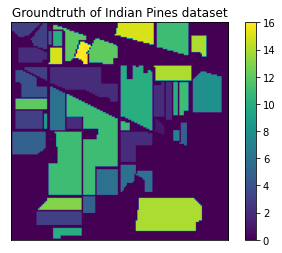

In [74]:
plt.imshow(indian_pines_gt)
plt.title('Groundtruth of Indian Pines dataset')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

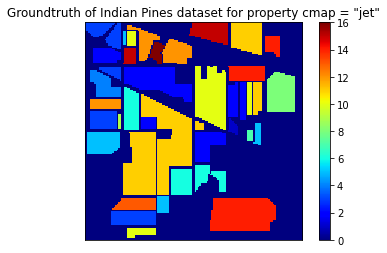

In [75]:
plt.imshow(indian_pines_gt, cmap = "jet", interpolation='nearest')
plt.title('Groundtruth of Indian Pines dataset for property cmap = "jet"')
plt.colorbar()
plt.savefig('/content/drive/My Drive/ITM/Indian Pines/img/imagen1.png')

plt.xticks([])
plt.yticks([])
plt.show()

In [76]:
#from IPython.display import Image
#Image('/content/drive/My Drive/ITM/Indian Pines/img/imagen.png')

Enter the band number of the image you want to view (The number to be between 0 and 199): 
1
(145, 145)


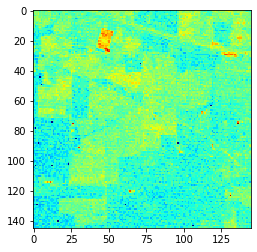

In [77]:
print('Enter the band number of the image you want to view (The number to be between 0 and 199): ')
count = int(input())
one_band = data[:, :, count]
plt.imshow(one_band, cmap = "jet", interpolation='nearest')
print(one_band.shape)

In [78]:
data = data.transpose((2, 0, 1))

In [79]:
print(data.shape)

(200, 145, 145)


In [80]:
array_expand = data[:,0,:]
for i_row in range(1, data.shape[1]):
    tempmatirx = data[:,i_row,:]
    array_expand = np.hstack((array_expand,tempmatirx))

In [81]:
print(array_expand.shape)

(200, 21025)


In [82]:
print(array_expand)

[[3172 2580 3687 ... 3153 3155 3323]
 [4142 4266 4266 ... 3864 4104 3860]
 [4506 4502 4421 ... 4282 4106 4197]
 ...
 [1057 1064 1061 ... 1003 1011 1007]
 [1020 1029 1030 ... 1008 1005 1004]
 [1020 1020 1016 ... 1000 1003 1000]]


In [84]:
array_expand = array_expand.transpose((1, 0))
print(array_expand.shape)

(21025, 200)


In [86]:
print(array_expand)

[[3172 4142 4506 ... 1057 1020 1020]
 [2580 4266 4502 ... 1064 1029 1020]
 [3687 4266 4421 ... 1061 1030 1016]
 ...
 [3153 3864 4282 ... 1003 1008 1000]
 [3155 4104 4106 ... 1011 1005 1003]
 [3323 3860 4197 ... 1007 1004 1000]]
